In [2]:
from preprocess import Preprocess
from kmeans import KMeansClustering
from lda import LDA
import logging
logging.getLogger().setLevel(logging.INFO)

In [5]:
data = Preprocess.open_pickle("F:\Development\smart_rejector_for_hate_speech\/twitter_data.pkl")
print(data[0])
filtered_data = Preprocess.filter_waseem_hovy(X=data, label='none')
tweets = [x[1] for x in filtered_data]
cleaned_data = Preprocess.clean(X=tweets)
km = KMeansClustering()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)

INFO:root:Original data length: 16089


{'text': 'rt @colonelkickhead: another bloody instant restaurant week ?  !  ?  !  seriously !  they just jumped the shark riding two other sharks powered by sh…', 'label': 'none'}


KeyError: 2

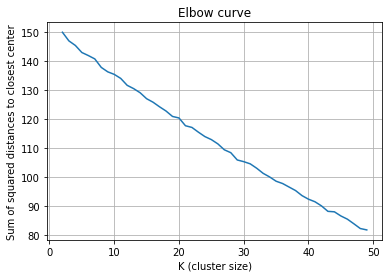

In [3]:
%matplotlib inline
km.plot_elbow_curve(max_k=50, X=X)

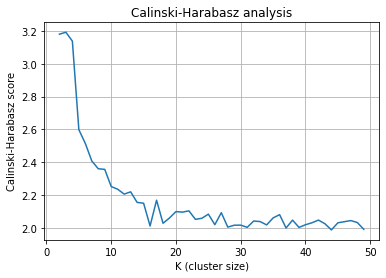

In [5]:
%matplotlib inline
# Higher values are better, when clusters are dense and well separated
km.plot_calinski_harabasz_analysis(max_k=50, X=X)

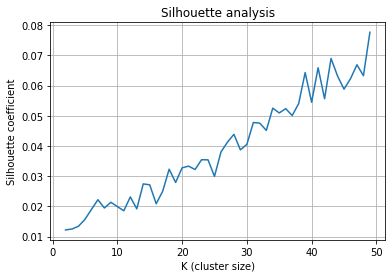

In [6]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=50, X=X)

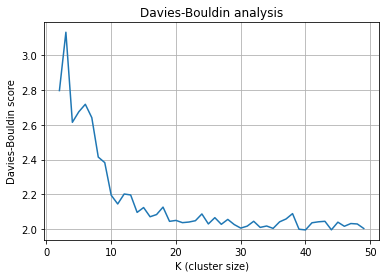

In [7]:
%matplotlib inline
# Values close to zero indicate a better partition
km.plot_davies_bouldin_score_analysis(max_k=50, X=X)

In [8]:
K = 5
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 bitch dick skank suck pussy ass rape girl choke make

Cluster 1:
 fuck shut dont bitch like slut pls fucking afghanistan die

Cluster 2:
 stfu bitch hoe know im shit ass pussy life want

Cluster 3:
 whore ll bitch getting just idiot ass piece slut shit

Cluster 4:
 fucking cunt stop bitch stupid look dumb believe mouth ugly



In [9]:
km.cluster(X= X, K=K)
km.print_most_representative_samples(original_data=filtered_data, X=X, num_samples=5)

Cluster 0: most representative sample indices: [24 80 13 32 36]
['4861', 'People in airport bars always wanna tell you their life stories... STFU Bill, IDGAF about your stupid daughter and whore wife', '1', '1', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['5779', "No bitch you don't look like a model, nor will you ever. So stop saying youre ugly so people will call you pretty! #AttentionWhores", '1', '1', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['4738', 'But remember, you cheated on me first, you’re a whore, you’re a whore, this is whore 😂😂😂', '1', '1', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['4935', 'Lol omg you’re such a whore. 😂😂😂 “Who does that Sara?” Blah blah bitch look at yourself😂😂🤘🏼', '1', '1', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['4978', 'Punch that girl right in the skank', '1', '1', '1', '', '', '', '', '', '', '', '', '', '', '', '', '',

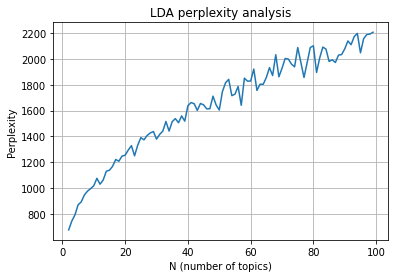

In [3]:
lda = LDA()
X = lda.fit_tf(X=cleaned_data)
pred = lda.fit_lda(X=X, n_components=2)
# Lower values are better
# Perplexity indicates how well the probability model predicts the samples
lda.plot_perplexity(max_n=100, X=X)

In [7]:
lda = LDA()
X = lda.fit_tf(X=cleaned_data)
pred = lda.fit_lda(X=X, n_components=10)
lda.print_top_terms()

Topic:  0
['bitch', 'dumb', 'stupid', 'hoe', 'stfu', 'youre', 'fuck', 'know', 'dont', 'im']
Topic:  1
['bitch', 'make', 'beat', 'whore', 'dick', 'll', 'don', 'women', 'yes', 'need']
Topic:  2
['bitch', 'dont', 'want', 'shut', 'fuck', 'raped', 'ass', 'rape', 'slut', 'right']
Topic:  3
['bitch', 'fucking', 'just', 'want', 'da', 'cunt', 'wanna', 'stupid', 'beat', 'car']
Topic:  4
['bitch', 'fuck', 'shut', 'look', 'whore', 'ass', 'rape', 'skank', 'slut', 'got']
Topic:  5
['bitch', 'hoe', 'shit', 'ass', 'fucking', 'fuck', 'stfu', 'pussy', 'im', 'ur']
Topic:  6
['bitch', 'just', 'fuck', 'like', 'skank', 'hoe', 'shut', 'life', 'little', 'know']
Topic:  7
['fucking', 'bitch', 'cunt', 'stop', 'stupid', 'fuck', 'stfu', 'ass', 'pussy', 'oh']
Topic:  8
['bitch', 'ass', 'whore', 'hit', 'youre', 'ur', 'ride', 'rape', 'girl', 'getting']
Topic:  9
['bitch', 'whore', 'like', 'know', 'stfu', 'shit', 'want', 'lol', 'pussy', 'don']
